In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Прочитайте csv файл (використовуйте функцію read_csv)
#Виведіть перші п'ять рядків (використовується функція head)

books = pd.read_csv('bestsellers with categories.csv')
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
#Виведіть розміри датасету (використовуйте атрибут shape)
books.shape

(550, 7)

 Про скільки книг зберігає дані датасет? 
 Відповідь: 550

In [4]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
books.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Первинне дослідження даних

In [5]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні)
Відповідь: Ні

In [6]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
books.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?
Відповідь: 'Non Fiction', 'Fiction'

<Axes: title={'center': 'Розподіл цін на книги'}, ylabel='Frequency'>

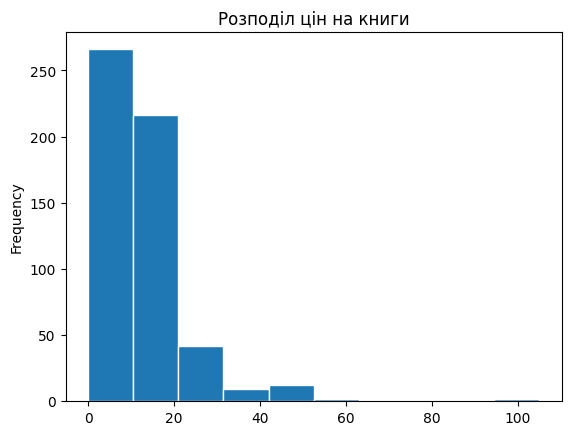

In [7]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
books['price'].plot(kind='hist', title='Розподіл цін на книги', edgecolor="white")

In [8]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
print(f"Максимальна ціна? Відповідь: {books.price.max()}")
print(f"Мінімальна ціна? Відповідь: {books.price.min()}")
print(f"Середня ціна? Відповідь: {books.price.mean()}")
print(f"Медіанна ціна? Відповідь: {books.price.median()}")

Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0


Пошук та сортування даних

In [9]:
print('Який рейтинг у датасеті найвищий? Відповідь: ', books['user_rating'].max())

Який рейтинг у датасеті найвищий? Відповідь:  4.9


In [10]:
print('Скільки книг мають такий рейтинг? Відповідь: ', (books['user_rating']==books['user_rating'].max()).sum())

Скільки книг мають такий рейтинг? Відповідь:  52


In [17]:
print(f'Яка книга має найбільше відгуків\nВідповідь:\n')
books[books.reviews == books.reviews.max()]

Яка книга має найбільше відгуків
Відповідь:



,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [18]:
top50 = books[books['year']==2015]
print(f'З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?\nВідповідь:\n')
top50[top50['price']==top50['price'].max()]

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
Відповідь:



,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [24]:
print(f'Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?\nВідповідь:', ((books['year']==2010) & (books['genre']=='Fiction')).sum())

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
Відповідь: 20


In [26]:
df = books[(books['year']==2010) | (books['year']==2011)]['user_rating'].isin([4.9]).sum()
print(f'Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?\nВідповідь:', df)

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
Відповідь: 1


In [34]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
result= books[(books['year']==2015) & (books['price']<8)].sort_values(by='price')
result

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [35]:
print(f'Яка книга остання у відсортованому списку?\nВідповідь:\n',result.iloc[-1])

Яка книга остання у відсортованому списку?
Відповідь:
 name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object


Агрегування даних та з'єднання таблиць

In [36]:
#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
result = books.groupby('genre')['price'].agg(['min', 'max'])
result

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [37]:
print('Максимальна ціна для жанру Fiction: Відповідь: ', result.query('genre=="Fiction"')['max'].values[0])
print('Мінімальна ціна для жанру Fiction: Відповідь: ', result.query('genre=="Fiction"')['min'].values[0])
print('Максимальна ціна для жанру Non Fiction: Відповідь: ', result.query('genre=="Non Fiction"')['max'].values[0])
print('Мінімальна ціна для жанру Non Fiction: Відповідь: ', result.query('genre=="Non Fiction"')['min'].values[0])

Максимальна ціна для жанру Fiction: Відповідь:  82
Мінімальна ціна для жанру Fiction: Відповідь:  0
Максимальна ціна для жанру Non Fiction: Відповідь:  105
Мінімальна ціна для жанру Non Fiction: Відповідь:  0


In [39]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
authors = books[['name', 'author']].groupby('author').agg(count=('name','count')).reset_index()
authors

,author,count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [48]:
print(f'Якої розмірності вийшла таблиця? Відповідь: {authors.shape}')

Якої розмірності вийшла таблиця? Відповідь: (248, 2)


In [50]:
max_books = authors.sort_values('count').tail(1)
print('Який автор має найбільше книг? Відповідь: ', max_books.values[0][0])
print('Скільки книг цього автора? Відповідь: ', max_books.values[0][1])

Який автор має найбільше книг? Відповідь:  Jeff Kinney
Скільки книг цього автора? Відповідь:  12


In [55]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
ratings = books[['author', 'user_rating']].groupby('author').agg(avg_rating=('user_rating', 'mean')).round(1).reset_index().sort_values("avg_rating")
ratings

,author,avg_rating
71,Donna Tartt,3.9
100,Gillian Flynn,4.0
171,Muriel Barbery,4.0
90,Gallup,4.0
109,Ian K. Smith M.D.,4.1
...,...,...
73,Dr. Seuss,4.9
82,Emily Winfield Martin,4.9
83,Eric Carle,4.9
26,Bill Martin Jr.,4.9


In [57]:
print(f"У якого автора середній рейтинг мінімальний? Відповідь: {ratings.author.iloc[0]}")
print(f"Який у цього автора середній рейтинг? Відповідь: {ratings.avg_rating.iloc[0]}")

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Який у цього автора середній рейтинг? Відповідь: 3.9


In [60]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
result = pd.concat([authors, ratings.avg_rating], axis=1)
result = result.rename(columns={"count": "book_count", "mean": "avg_rating"})
result

,author,book_count,avg_rating
0,Abraham Verghese,2,4.6
1,Adam Gasiewski,1,4.4
2,Adam Mansbach,1,4.8
3,Adir Levy,1,4.8
4,Admiral William H. McRaven,1,4.7
...,...,...,...
243,Walter Isaacson,3,4.6
244,William Davis,2,4.4
245,William P. Young,2,4.6
246,Wizards RPG Team,3,4.8


In [63]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
result = result.sort_values(['book_count', 'avg_rating'])
result

,author,book_count,avg_rating
171,Muriel Barbery,1,4.0
43,Chris Cleave,1,4.1
109,Ian K. Smith M.D.,1,4.1
186,Pierre Dukan,1,4.1
81,Elizabeth Strout,1,4.2
...,...,...,...
11,American Psychological Association,10,4.5
92,Gary Chapman,11,4.7
226,Suzanne Collins,11,4.7
197,Rick Riordan,11,4.8


In [64]:
print(f"Який автор перший у списку? Відповідь: {result.author.iloc[0]}")

Який автор перший у списку? Відповідь: Muriel Barbery


Text(0.5, 1.0, 'Залежність ціни книги від рейтингу з розподілом по жанрам')

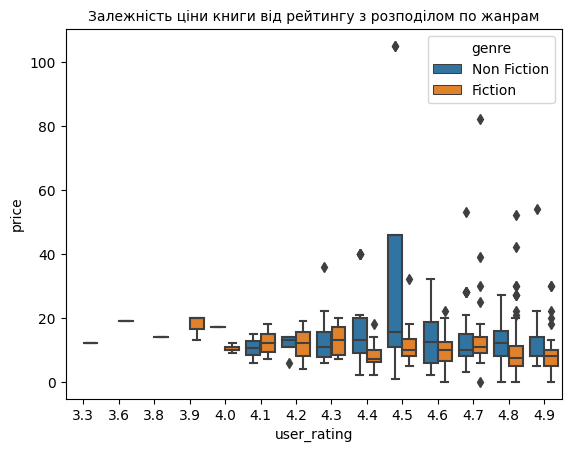

In [67]:
sns.boxplot(x="user_rating", 
            y="price", 
            hue="genre", 
            data=books)
plt.title('Залежність ціни книги від рейтингу з розподілом по жанрам', fontsize=10)

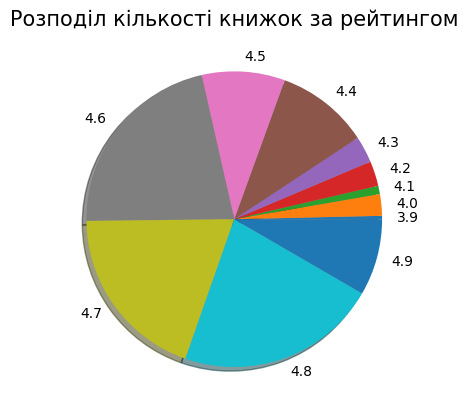

In [77]:
data = result.groupby('avg_rating')['book_count'].sum().reset_index()
plt.pie(data['book_count'].values, 
        labels=data['avg_rating'].values, 
        shadow=True, 
        labeldistance=1.1
       )
plt.title('Розподіл кількості книжок за рейтингом', 
          fontsize=15, 
          y=1)
plt.show()

Text(0.5, 1.0, 'Залежність кількості оглядів від року продажу')

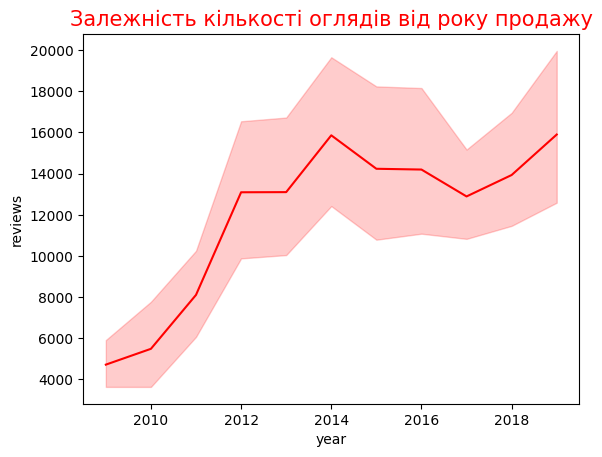

In [74]:
sns.lineplot(x="year", 
             y="reviews", 
             data=books, 
             color='r')
plt.title('Залежність кількості оглядів від року продажу', 
          fontsize=15, 
          color='r')